# Glasgow

http://ubdc.gla.ac.uk/nl/dataset/Wi-Fi%20Access%20Point%20Locations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utm

In [3]:
data = pd.read_csv("./data/glasgowdl.csv")

In [4]:
data.head()

,BSSID,Latitude,Longitude,Security
0,001B2F920229,55.865639,-4.283733,None
1,001BBFBA1111,55.865639,-4.283733,WPA
2,2A02978A71A9,55.874442,-4.292580,None
3,0016010D309B,55.874442,-4.292580,None
4,003065249DC0,55.874442,-4.292580,None


In [8]:
max(list(data['Longitude']))

-3.963352

In [42]:
X = []
Y = []
N = len(data['Longitude'])
for i in range(N):
    x,y, w_, w__ = utm.from_latlon(data['Latitude'][i], data['Longitude'][i])
    X.append(x)
    Y.append(y)

In [43]:
data.loc[:,'X'] = pd.Series(X -np.mean(X), index=data.index)
data.loc[:,'Y'] = pd.Series(Y -np.mean(Y), index=data.index)

In [44]:
data.to_csv('./data/glasgow_xy.csv')

In [19]:
df_km = data.loc[data['X'] < 300]
df_km = df_km.loc[df_km['X']> 0]
df_km = df_km.loc[df_km['Y']< 300]
df_km = df_km.loc[df_km['Y']>0]

print(df_km.size)

1824


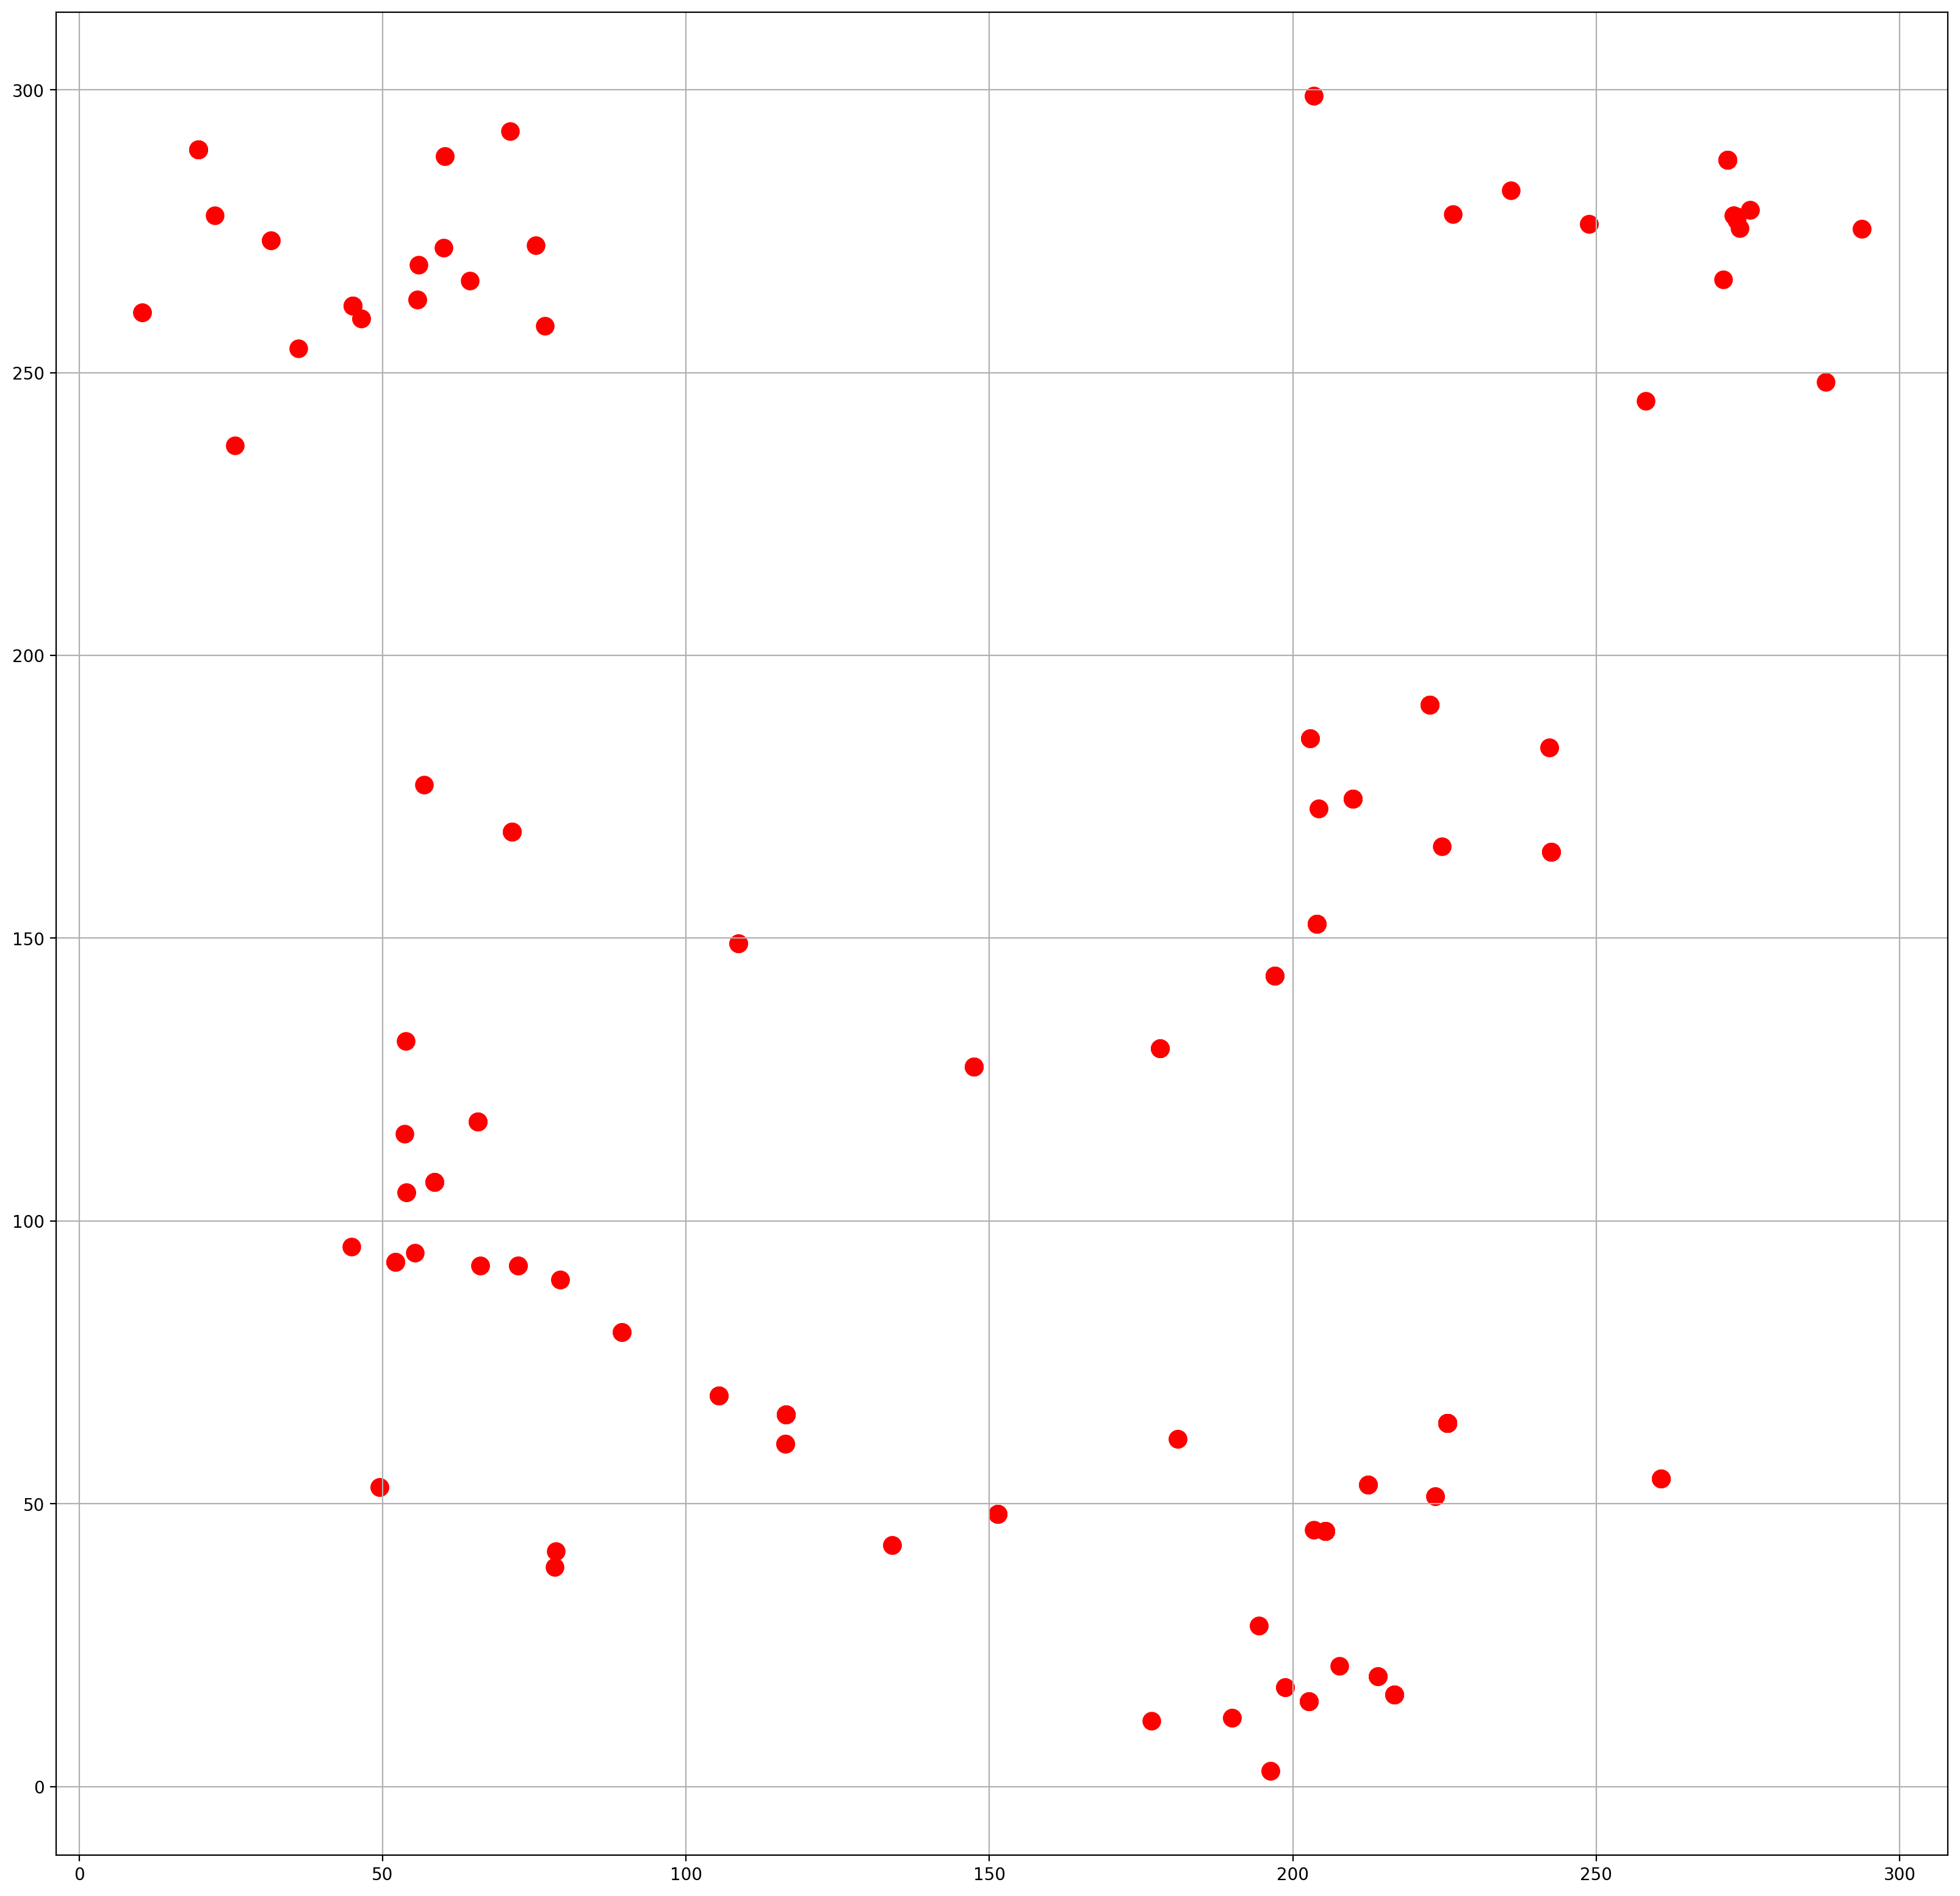

In [28]:
plt.figure(figsize=(20, 20), dpi= 200)
plt.scatter(df_km['X'], df_km['Y'], 100, color='red')
plt.grid()

Lx = np.max(df_km['X']) - np.min(df_km['X'])
Ly = np.max(df_km['Y']) - np.min(df_km['Y'])
A = Lx*Ly
N = df_km.size
print(N)
print('Area:\t' + str(int(A)) + ' m^2')
density = N/A
print('Density: ' + str(int(density*1e6)) + ' AP/km^2')

In [38]:
df_km.to_csv('./data/glasgow_0_to_300.csv')